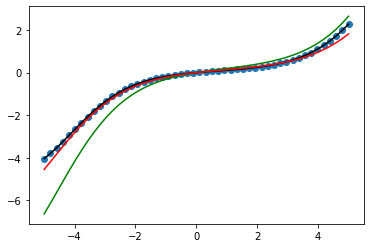

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def Unit3LC2(sn,funcno):
# seminar7a Using gradient descent (sequential form) to do nonlinear parameter fitting
# sn is parameter controlling the amount of noise added to the function
# funcno is 1 for simple function, 2 for more complicated function (there
# will be local minima). If value other than 1 or 2 is provided, default
# will be simple function

    if funcno==2:
        myfunc=lambda x,params,ns: mynoisyfunction2(x,params,ns)        
        mygrad=lambda x,params: gradF2(x,params)
        trueparams=np.array([0.3,1,2]).reshape(3,1)
    else:
        myfunc=lambda x,params,ns: mynoisyfunction1(x,params,ns)        
        mygrad=lambda x,params: gradF1(x,params)
        trueparams=np.array([0.3,-2,-3]).reshape(3,1)
    
    # Limiting ourselves to interval [-5,5] -- this could be changed
    # Have 50 samples -- this could also be changed
    x = np.linspace(-5,5,50)
    
    # Plot target data
    targets = myfunc(x,trueparams,sn) # targets have noise
    plt.plot(x,targets,'o')
    plt.plot(x,myfunc(x,trueparams,0),'k-') # true underlying function

    # Perform gradient descent to determine the parameters (a,b,c)
    # that minimise a quadratic error criterion.

    if funcno==2: # best to initialise the estimated parameters close enough (investigate why!)
        estparams = trueparams+0.5*np.random.rand(3,1)
    else:
        estparams = np.random.rand(3,1) # generate a random initial solution for (a,b,c) 

    # Plot function using current parameter estimates
    plt.plot(x,myfunc(x,estparams,0),'g-') # estimates don't have noise

    # gradient descent loop: to be written / completed
    error_sum = 100000000
    while error_sum > 0.1:
      est = myfunc(x,estparams,0)
      
      #L=y-ŷ
      total_error = np.subtract(targets, est)
      total_error /= 50

      #y(x)=a*x^2+b*x+c
      if funcno==1:
        #dL/da
        estparams[0] += 0.01*np.dot(total_error, np.square(x))
        #dL/db
        estparams[1] += 0.01*np.dot(total_error, x)
        #dL/dc
        estparams[2] += 0.01*np.dot(total_error, np.ones(total_error.shape))

      #y(x)=a*x*exp(−cos((x−b)/c))
      elif funcno==2:
        a = estparams[0]
        b = estparams[1]
        c = estparams[2]

        #dL/da = x e^(-cos((x - b)/c))
        dl_a = np.multiply(x, np.exp(-np.cos((x - b)/c)))
        estparams[0] += 0.01*np.dot(total_error, dl_a)

        #dL/db = (a x sin((b - x)/c) e^(-cos((b - x)/c)))/c
        # dl_b = a*np.multiply(np.multiply(x, np.sin(np.subtract(b, x)/c)),np.exp(-np.cos(np.subtract(b, x)/c))))/c)
        dl_b = np.multiply(x, np.sin(np.subtract(b, x)/c))
        dl_b = a*np.multiply(dl_b, np.exp(-np.cos(np.subtract(b, x)/c)))
        dl_b /= c
        estparams[1] += 0.01*np.dot(total_error, dl_b)

        #dL/dc = (a x (x - b) sin((b - x)/c) e^(-cos((b - x)/c)))/c^2
        dl_c = np.multiply(np.subtract(x, b), np.sin(np.subtract(b, x)/c))
        dl_c = np.multiply(x, dl_c)
        dl_c = np.multiply(a, dl_c)
        dl_c = np.multiply(dl_c, np.exp(-np.cos(np.subtract(b, x)/c)))
        dl_c /= c**2
        estparams[2] += 0.01*np.dot(total_error, dl_c)
      
      error_sum = np.sum(total_error)

    # Plot estimated function
    plt.plot(x,myfunc(x,estparams,0),'r-');    
    plt.show()

# Some arbitrary function
def mynoisyfunction1(x,params,ns):
    # function is: a*x^2+b*x+c
    # x is input
    # ns scales uniform noise
    # this function has 3 free parameters stored in params: [a,b,c].
    y = params[0]*x**2+params[1]*x+params[2]  
    y = y+ns*(np.random.rand(*x.shape)-0.5) # *x.shape unpacks x.shape into two arguments as needed
    return y

# Gradient of error wrt params (evaluated at x)
def gradF1(x,params):
    # x: current x value
    # params: current estimtes of parameters
    # y = 2*params[0]*x+params[1]
    y= np.asarray([x**2, x, 1])#.reshape(3,len(x)) # fill this! 
    return y 

# Some arbitrary function
def mynoisyfunction2(x,params,ns):
    # function is: a*x*exp(-cos((x-b)/c))
    # x is input
    # ns scales uniform noise
    # this function has 3 free parameters stored in params: [a,b,c].
    y = params[0]*x*np.exp(-np.cos((x-params[1])/params[2]))
    y = y+ns*(np.random.rand(*x.shape)-0.5)
    return y

# Gradient of error wrt params (evaluated at x)
def gradF2(x,params):
    # x: current x value
    # params: current estimtes of parameters
    y = (params[0]*(x*sin((x - params[1])/params[2]) + params[2])*np.exp(-np.cos((params[1] - x)/params[2])))/params[2]
    y= np.asarray(y)#.reshape(3,1) # fill this! 
    return y

if __name__ == "__main__":
    Unit3LC2(0.0,2) # First parameter is noise, second parameter is function number


